In [1]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests

2024-07-22 08:49:59.662021: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 08:49:59.662155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 08:49:59.796857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

preprocessor_config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True) 
model.to("cuda:0")

config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

LlavaNextForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): Q

In [20]:
def llavanext(image_string, prompt, max_tokens=500, url=False):
    if url:    
        image = Image.open(requests.get(image_string, stream=True).raw)
    else:
        image = Image.open(image_string)
        
    prompt = f"[INST] <image>\n{prompt} [/INST]"
    inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
    output = model.generate(**inputs, max_new_tokens=max_tokens)
    print(processor.decode(output[0], skip_special_tokens=True))
#     return processor.decode(output[0], skip_special_tokens=True)    

In [21]:
# prepare image and text prompt, using the appropriate prompt template
url = "https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)

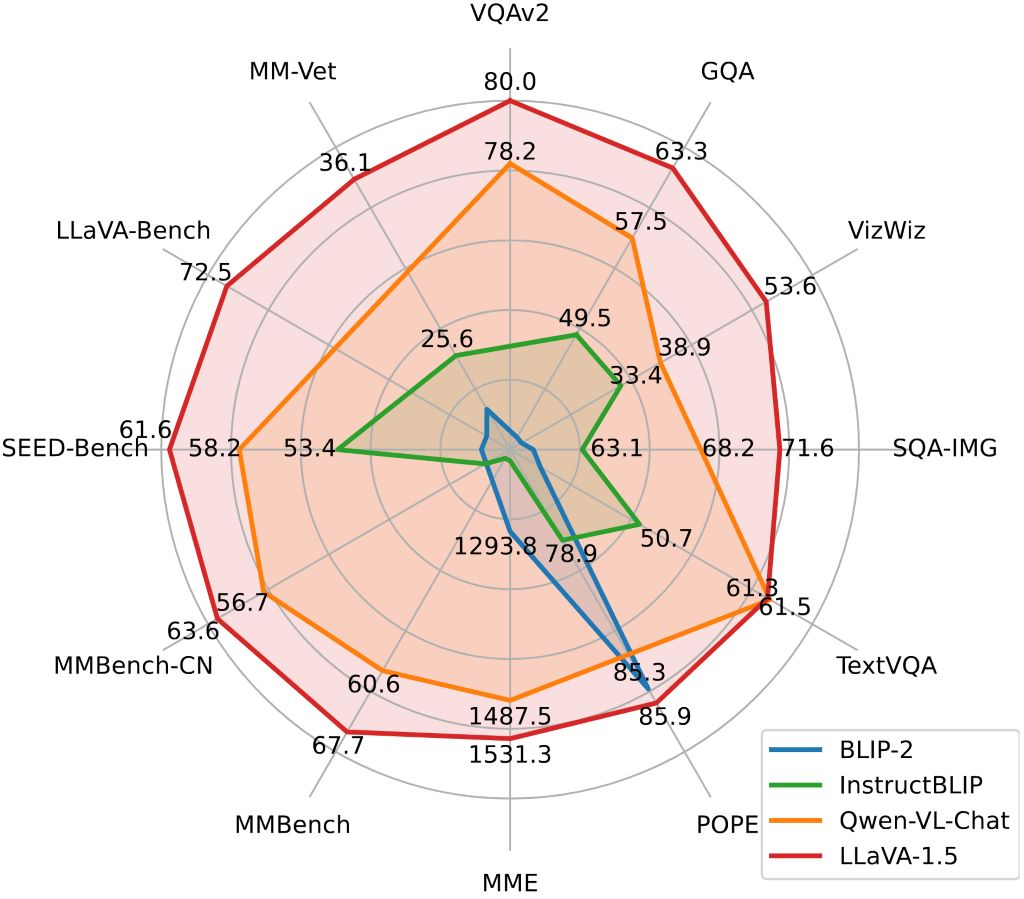

In [22]:
image

In [23]:
llavanext(image_string='https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true', url=True, prompt='What is shown in this image?')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
What is shown in this image? [/INST] The image appears to be a radar chart, which is a type of multi-dimensional plot that displays values for multiple quantitative variables represented on axes starting from the same point. This particular radar chart is showing the performance of different models or systems across various metrics.

The axes represent different metrics or benchmarks, such as MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, MM-Vet, M


In [24]:
image2 = Image.open('/kaggle/input/ocr-test-data/image (2).jpg')

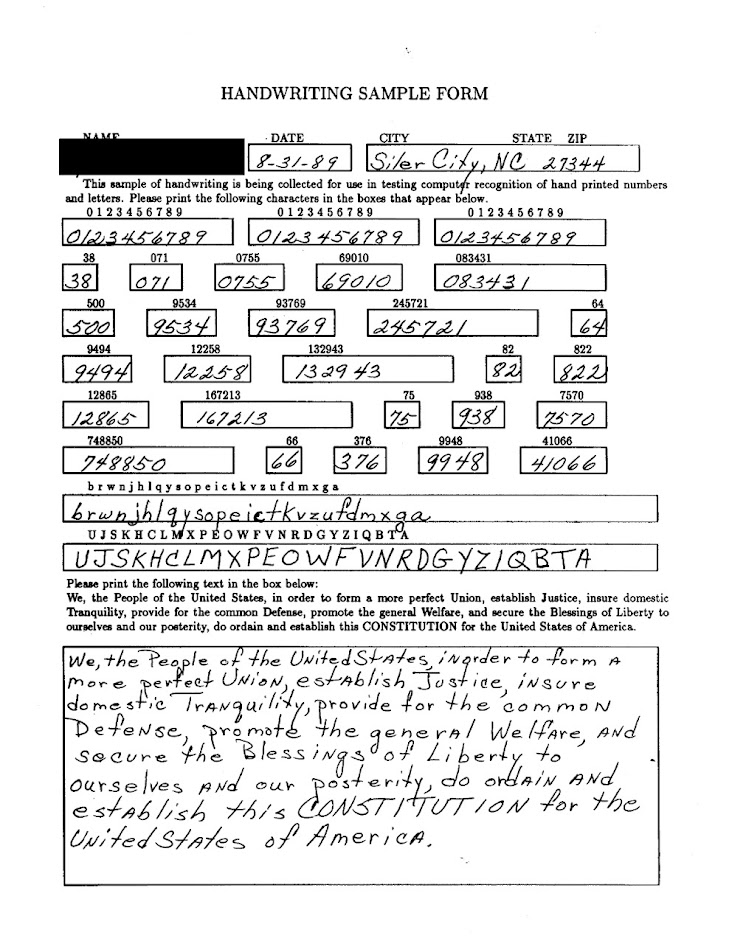

In [25]:
image2

In [26]:
llavanext('/kaggle/input/ocr-test-data/image (2).jpg',
                    'Can you provide the handwritten text in the image?')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
Can you provide the handwritten text in the image? [/INST] The handwritten text in the image is as follows:

```
We, the People of the United States, in order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common Defense, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our posterity, do ordain and establish this Constitution for the United States of America.
```

Please note that the text is a reproduction of the preamble to the United States Constitution, which is a well-known and widely recognized phrase. 


In [28]:
llavanext('/kaggle/input/ocr-test-data/image (2).jpg',
                    'Can you give me the information in the form image in a structured manner?',
         max_tokens = 1000)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
Can you give me the information in the form image in a structured manner? [/INST] Certainly! Here is the information from the handwriting sample form image in a structured format:

```
Name: [Redacted]
Date: 8-31-89
City: Silver City, NC 27344

Sample of handwriting:

1. 0123456789
2. 0123456789
3. 0123456789
4. 0123456789
5. 0123456789
6. 0123456789
7. 0123456789
8. 0123456789
9. 0123456789
10. 0123456789
11. 0123456789
12. 0123456789
13. 0123456789
14. 0123456789
15. 0123456789
16. 0123456789
17. 0123456789
18. 0123456789
19. 0123456789
20. 0123456789
21. 0123456789
22. 0123456789
23. 0123456789
24. 0123456789
25. 0123456789
26. 0123456789
27. 0123456789
28. 0123456789
29. 0123456789
30. 0123456789
31. 0123456789
32. 0123456789
33. 0123456789
34. 0123456789
35. 0123456789
36. 0123456789
37. 0123456789
38. 0123456789
39. 0123456789
40. 0123456789
41. 0123456789
42. 0123456789
43. 0123456789
44. 0123456789
45. 0123456789
46. 0123456789
47. 0123456789
48. 0123456789
49. 0123456

In [32]:
llavanext('/kaggle/input/ocr-test-data/image (2).jpg',
                    'Can you tell me what is written in the image?',
         max_tokens = 1000)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
Can you tell me what is written in the image? [/INST] The image contains a handwritten sample form with various fields filled out. Here is the information that is visible:

- NAME: The name is redacted and appears to be blacked out.
- DATE: The date is "8-31-89."
- CITY: The city is "Silver City, NC 27344."
- ZIP: The zip code is "27344."
- STATE: The state is "North Carolina."
- ADDRESS: The address is "123 Main St."
- PHONE: The phone number is "910-555-1234."
- SOCIAL SECURITY NUMBER: The SSN is redacted and appears to be blacked out.
- DRIVER'S LICENSE NUMBER: The license number is redacted and appears to be blacked out.
- MILITARY SERVICE: The military service is "US Army."
- RANK: The rank is "E4."
- DATE OF ENLISTMENT: The date is "1-1-89."
- DATE OF DISCHARGE: The date is "1-1-94."
- BRANCH OF SERVICE: The branch is "Infantry."
- COMBAT RELATED INJURY: The answer is "No."
- PRISONER OF WAR: The answer is "No."
- SEPARATION REASON: The reason is "Honorable Discharge."
-

In [29]:
image3 = Image.open('/kaggle/input/ocr-test-data/Screenshot 2024-07-22 at 2.32.36PM.png')

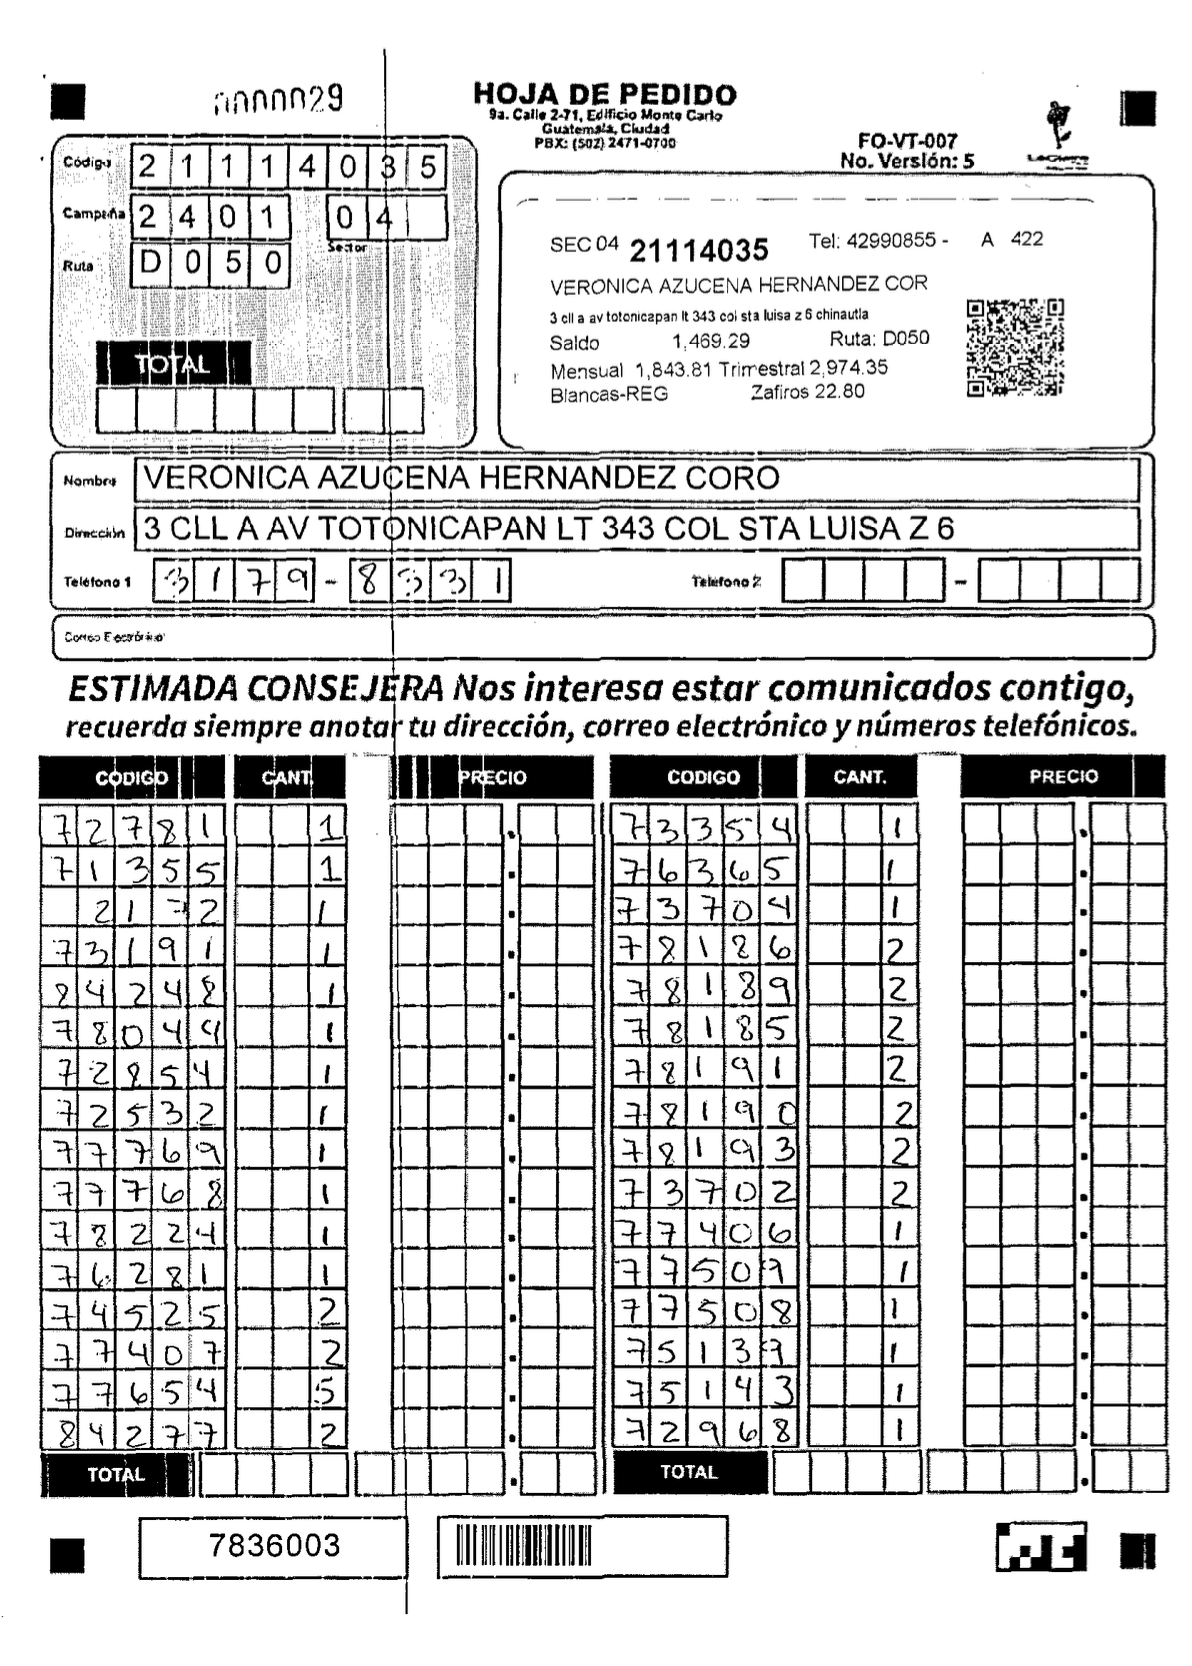

In [30]:
image3

In [31]:
llavanext('/kaggle/input/ocr-test-data/Screenshot 2024-07-22 at 2.32.36PM.png', 
         'Can you output the form data in a structured format for me?')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
Can you output the form data in a structured format for me? [/INST] Certainly! Here is the data from the form in a structured format:

```
HOJA DE PEDIDO
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------